## Итак, попытаемся предсказать оценку отеля, как класс, представляя отзыв One-hot-encoding способом

In [10]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt 
df = pd.read_csv('train.csv', encoding= 'unicode_escape')
df.head()

,Id,Hotel_name,Review_Title,Review_Text,Rating
0,0,Park Hyatt,Refuge in Chennai,Excellent room and exercise facility. All arou...,80.0
1,1,Hilton Chennai,Hilton Chennai,Very comfortable and felt safe. \r\nStaff were...,100.0
2,2,The Royal Regency,No worth the rating shown in websites. Pricing...,Not worth the rating shown. Service is not goo...,71.0
3,3,Rivera,Good stay,"First of all nice & courteous staff, only one ...",86.0
4,4,Park Hyatt,Needs improvement,Overall ambience of the hotel is very good. In...,86.0


In [11]:
def create_vector_vocab(reviews):
  tokens = list(map(lambda x:set(x.split(" ")), reviews))
  vocab = set()
  for sent in tokens:
    for word in sent:
      if len(word)>0:
        vocab.add(word)
  vocab = list(vocab)

  word2index = {}
  for i,word in enumerate(vocab):
    word2index[word]=i
  return tokens, vocab, word2index

In [12]:
tokens, vocab, word2index = create_vector_vocab(df['Review_Text'])
input_dataset = list()

for sent in tokens:
  sent_indices = list()
  for word in sent:
    try:
      sent_indices.append(word2index[word]) # создаем для каждого предложения вектор с нулями и единицами
    except:
      ""
  input_dataset.append(list(set(sent_indices)))
input_dataset = np.array(input_dataset)
target_dataset = df['Rating'].astype(int)


/tmp/ipykernel_4703/1375148206.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_dataset = np.array(input_dataset)


In [13]:
print(len(input_dataset[1]))

24


In [14]:
input_vectors = np.zeros(shape=(df.shape[0], len(vocab)))
for i in range(len(input_dataset)):
  for j in input_dataset[i]:
    input_vectors[i, j] = 1  


In [15]:
target_dataset = np.array(target_dataset)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_vectors, target_dataset, test_size=0.2, random_state=42)

In [17]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [18]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([ 57,  60, 100, 100,  29, 100,  80,  80,  60,  71, 100,  86, 100,
        57,  86,  60,  60,  80,  80, 100,  29, 100,  29,  71, 100,  80,
        80,  20,  65,  80, 100, 100,  71, 100, 100,  86,  80,  86,  71,
        80,  71, 100,  71,  80, 100, 100,  86,  40,  40,  86, 100,  71,
        71,  86,  40,  71,  43,  71, 100,  86,  86, 100, 100,  43, 100,
        86,  20,  86,  80,  29, 100,  80, 100,  86, 100,  86,  43,  71,
        86,  65,  80, 100, 100,  40, 100,  57, 100, 100,  71, 100,  86,
        86,  86,  80,  57,  60, 100,  86,  80,  29, 100,  71,  71, 100,
        80, 100,  60,  80,  86,  80,  86,  80,  20,  86,  86, 100,  71,
        80,  57,  86,  60,  86,  60, 100, 100,  86,  80,  80,  86, 100,
        86,  60,  86,  80,  86,  80, 100,  60,  40, 100,  86,  60,  86,
        80,  60,  60,  86,  80, 100,  80,  80,  86,  40,  60,  60,  57,
        86,  60, 100,  57,  86,  57,  86,  86,  60,  86, 100,  71,  29,
        80, 100,  80,  86,  71,  71,  29,  60,  20,  80,  80,  7

In [19]:
print(metrics.precision_score(y_test, y_pred_log_reg, average='macro'))
print(metrics.f1_score(y_test, y_pred_log_reg, average='macro'))

0.5268878348527688
0.4699798336898419


In [20]:
print(metrics.mean_squared_error(y_test, y_pred_log_reg))

283.94692144373676


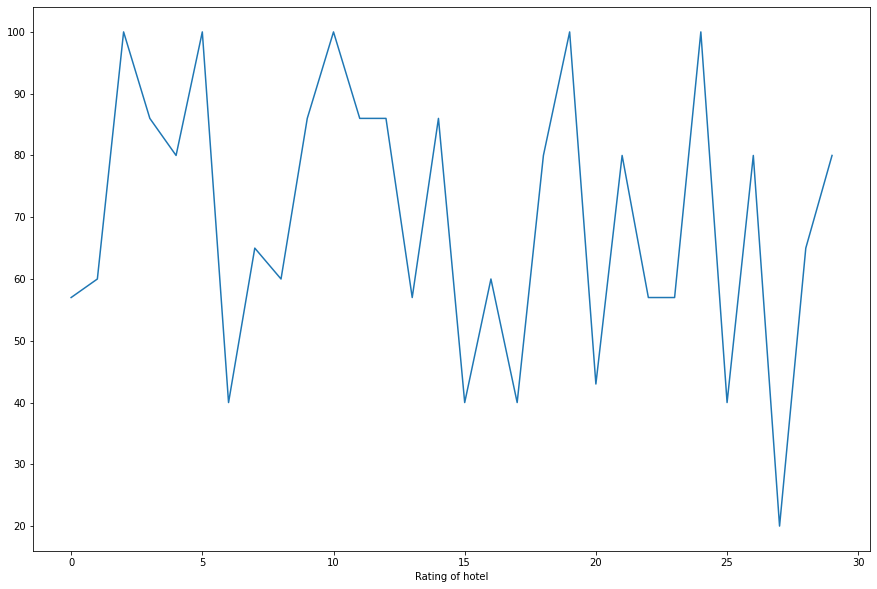

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(y_test[:30])), y_test[:30])
plt.xlabel('Rating of hotel')
plt.show()

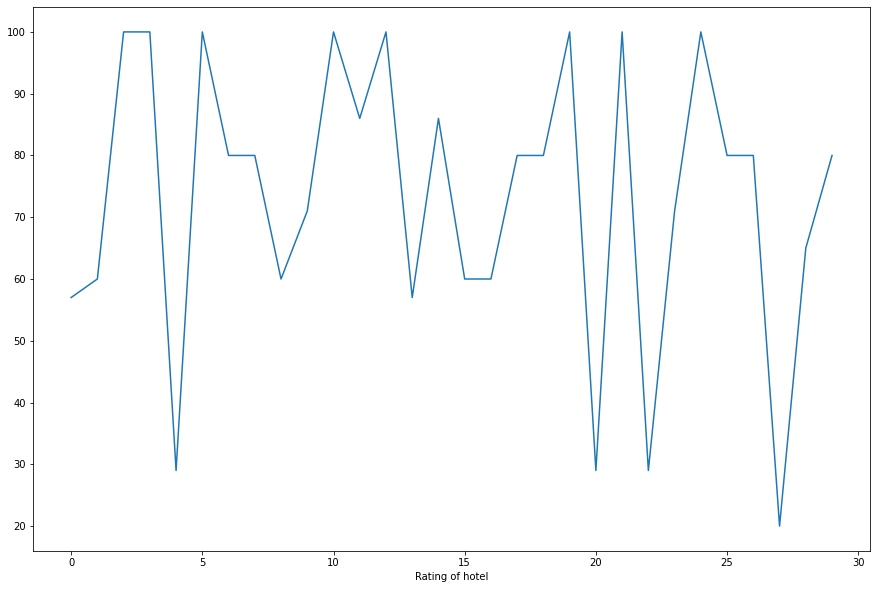

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(y_pred_log_reg[:30])), y_pred_log_reg[:30])
plt.xlabel('Rating of hotel')
plt.show()

## Как мы видим на первых 20 примерах графики с рейтингами достаточно похожи, однако попробуем добиться лучшего результата.

Удалим из словаря слов все слова, не несущие смысловой окраски. 

In [23]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fyodoraev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
sw_eng = set(stopwords.words('english'))
clean_vocab = []
for word in vocab:
  if not word in sw_eng:
    clean_vocab.append(word)
clean_word2index = {}
for i,word in enumerate(clean_vocab):
  clean_word2index[word]=i

In [25]:
clean_input = list()

for sent in tokens:
  sent_indices = list()
  for word in sent:
    try:
      sent_indices.append(clean_word2index[word]) # создаем для каждого предложения вектор с нулями и единицами
    except:
      ""
  clean_input.append(list(set(sent_indices)))
clean_input = list(clean_input)
clean_vectors = np.zeros(shape=(df.shape[0], len(clean_vocab)))
for i in range(len(clean_input)):
  for j in clean_input[i]:
    clean_vectors[i, j] = 1  

In [26]:
X_clean_train, X_clean_test,y_clean_train,y_clean_test = train_test_split(clean_vectors, target_dataset, train_size=0.8)
clean_log_reg = LogisticRegression().fit(X_clean_train, y_clean_train)
print(metrics.precision_score(y_clean_test, clean_log_reg.predict(X_clean_test), average='macro'))
print(metrics.f1_score(y_clean_test, clean_log_reg.predict(X_clean_test), average='macro'))
print(metrics.mean_squared_error(y_clean_test, clean_log_reg.predict(X_clean_test)))


0.5181623550207001
0.43363377203891074
325.25902335456476


Так результат мы не улучшили, попробуем другие способы представления отзывов.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vectorizer = TfidfVectorizer()
reviews = df['Review_Text'].tolist()
reviews = idf_vectorizer.fit_transform(reviews)
reviews.todense() # должно работать

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Попробуем решить нашу задачу, используя в качестве модели линейную регрессию, а не логистическую регрессию.

In [36]:
from sklearn.linear_model import LinearRegression
X_TF_train, X_TF_test, y_TF_train, y_TF_test = train_test_split(reviews, target_dataset , train_size = 0.8)
model = LinearRegression(fit_intercept = True).fit(X_TF_train , y_TF_train)
pred_TF = model.predict(X_TF_test)
pred_TF[pred_TF > 100] = 100
pred_TF[pred_TF<0]= 0
print(metrics.mean_squared_error(y_TF_test, pred_TF))

465.5245085957484


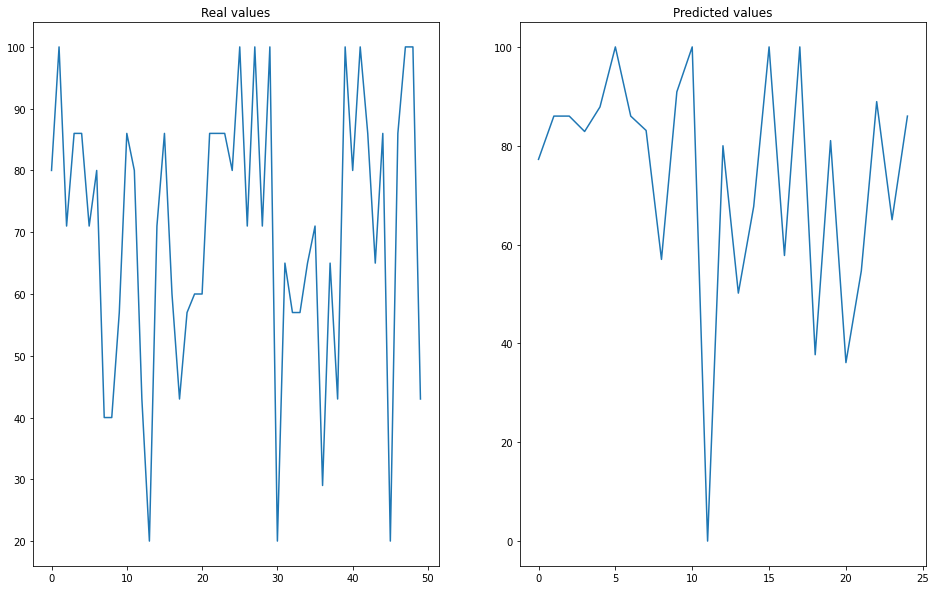

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(16,10))
axs[0].plot(range(len(target_dataset[:50])), target_dataset[:50])
axs[1].plot(range(len(pred_TF[:25])), pred_TF[:25])
axs[0].title.set_text('Real values')
axs[1].title.set_text('Predicted values')
plt.show()

## Таким образом мы совсем не улучшили результат, и среднеквадратическая ошибка у Ohe-hot-encoding'а всё еще наименьшая